### Import Required Libraries

In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from wordcloud import WordCloud

# NLP and text processing
import html
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Explainability
import shap
import lime

from sklearn.pipeline import Pipeline
from lime.lime_text import LimeTextExplainer

# Saving
import joblib

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

C:\ProgramData\anaconda3\envs\shap_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Load and Inspect the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('fake_job_postings.csv')

In [3]:
# first five columns
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
# Display number of rows and columns
df.shape

(17880, 18)

In [5]:
# Display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

### Data Cleaning and Preprocessing

In [6]:
df.sample(1)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
177,178,Underwriter,"US, UT, Draper",Approvals Department,0-0,Crest Financial is one of the leading privatel...,"Crest Financial is a fun, energetic, successfu...",High school diploma or general education degre...,Medical/Dental benefits for full time employee...,0,1,1,Other,Entry level,High School or equivalent,Financial Services,NaN,0


In [7]:
columns = list(df.columns)
columns

['job_id',
 'title',
 'location',
 'department',
 'salary_range',
 'company_profile',
 'description',
 'requirements',
 'benefits',
 'telecommuting',
 'has_company_logo',
 'has_questions',
 'employment_type',
 'required_experience',
 'required_education',
 'industry',
 'function',
 'fraudulent']

In [8]:
for col in columns:
    null_count = df[col].isnull().sum()
    print(f"Column {col} has {null_count} null values")

Column job_id has 0 null values
Column title has 0 null values
Column location has 346 null values
Column department has 11547 null values
Column salary_range has 15012 null values
Column company_profile has 3308 null values
Column description has 1 null values
Column requirements has 2696 null values
Column benefits has 7212 null values
Column telecommuting has 0 null values
Column has_company_logo has 0 null values
Column has_questions has 0 null values
Column employment_type has 3471 null values
Column required_experience has 7050 null values
Column required_education has 8105 null values
Column industry has 4903 null values
Column function has 6455 null values
Column fraudulent has 0 null values


In [9]:
# Display target distribution
df['fraudulent'].value_counts()

fraudulent
0    17014
1      866
Name: count, dtype: int64

In [10]:
# Create a short helper to get text length for the 'description' column
df['desc_len'] = df['description'].astype(str).apply(len)
df['desc_len'][:20]

0      905
1     2077
2      355
3     2600
4     1520
5     3418
6      433
7     2488
8       75
9     1219
10    2878
11    1159
12    1721
13     793
14     986
15    2995
16     314
17     390
18    1561
19    1391
Name: desc_len, dtype: int64

### Plot target balance

In [11]:
plt.rcParams['figure.figsize'] = (8,5)
sns.set()

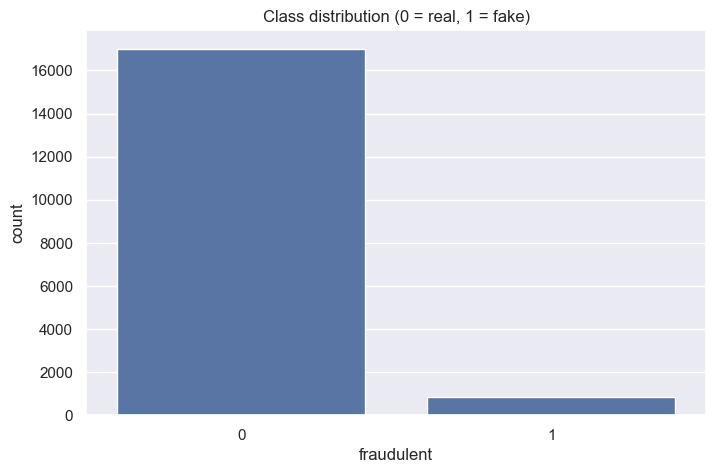

In [12]:
sns.countplot(x='fraudulent', data=df)
plt.title('Class distribution (0 = real, 1 = fake)')
plt.show()

### Plot description length distribution (real vs fake)

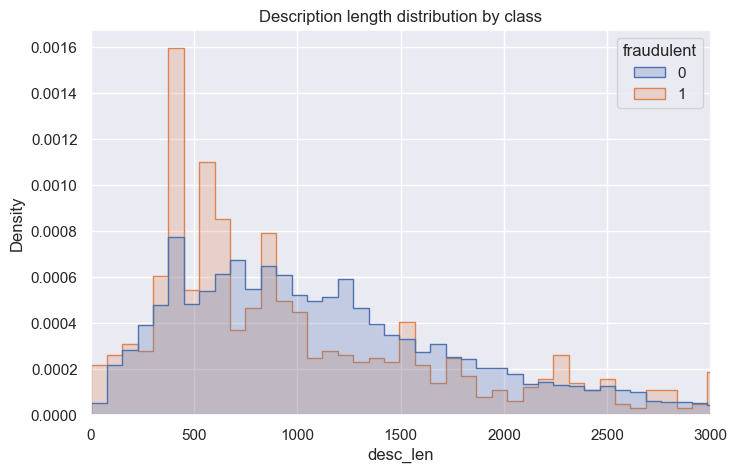

In [13]:
sns.histplot(data=df, x='desc_len', hue='fraudulent', element='step', stat='density', common_norm=False)
plt.title('Description length distribution by class')
plt.xlim(0, 3000)
plt.show()

### Visualize the missing value count

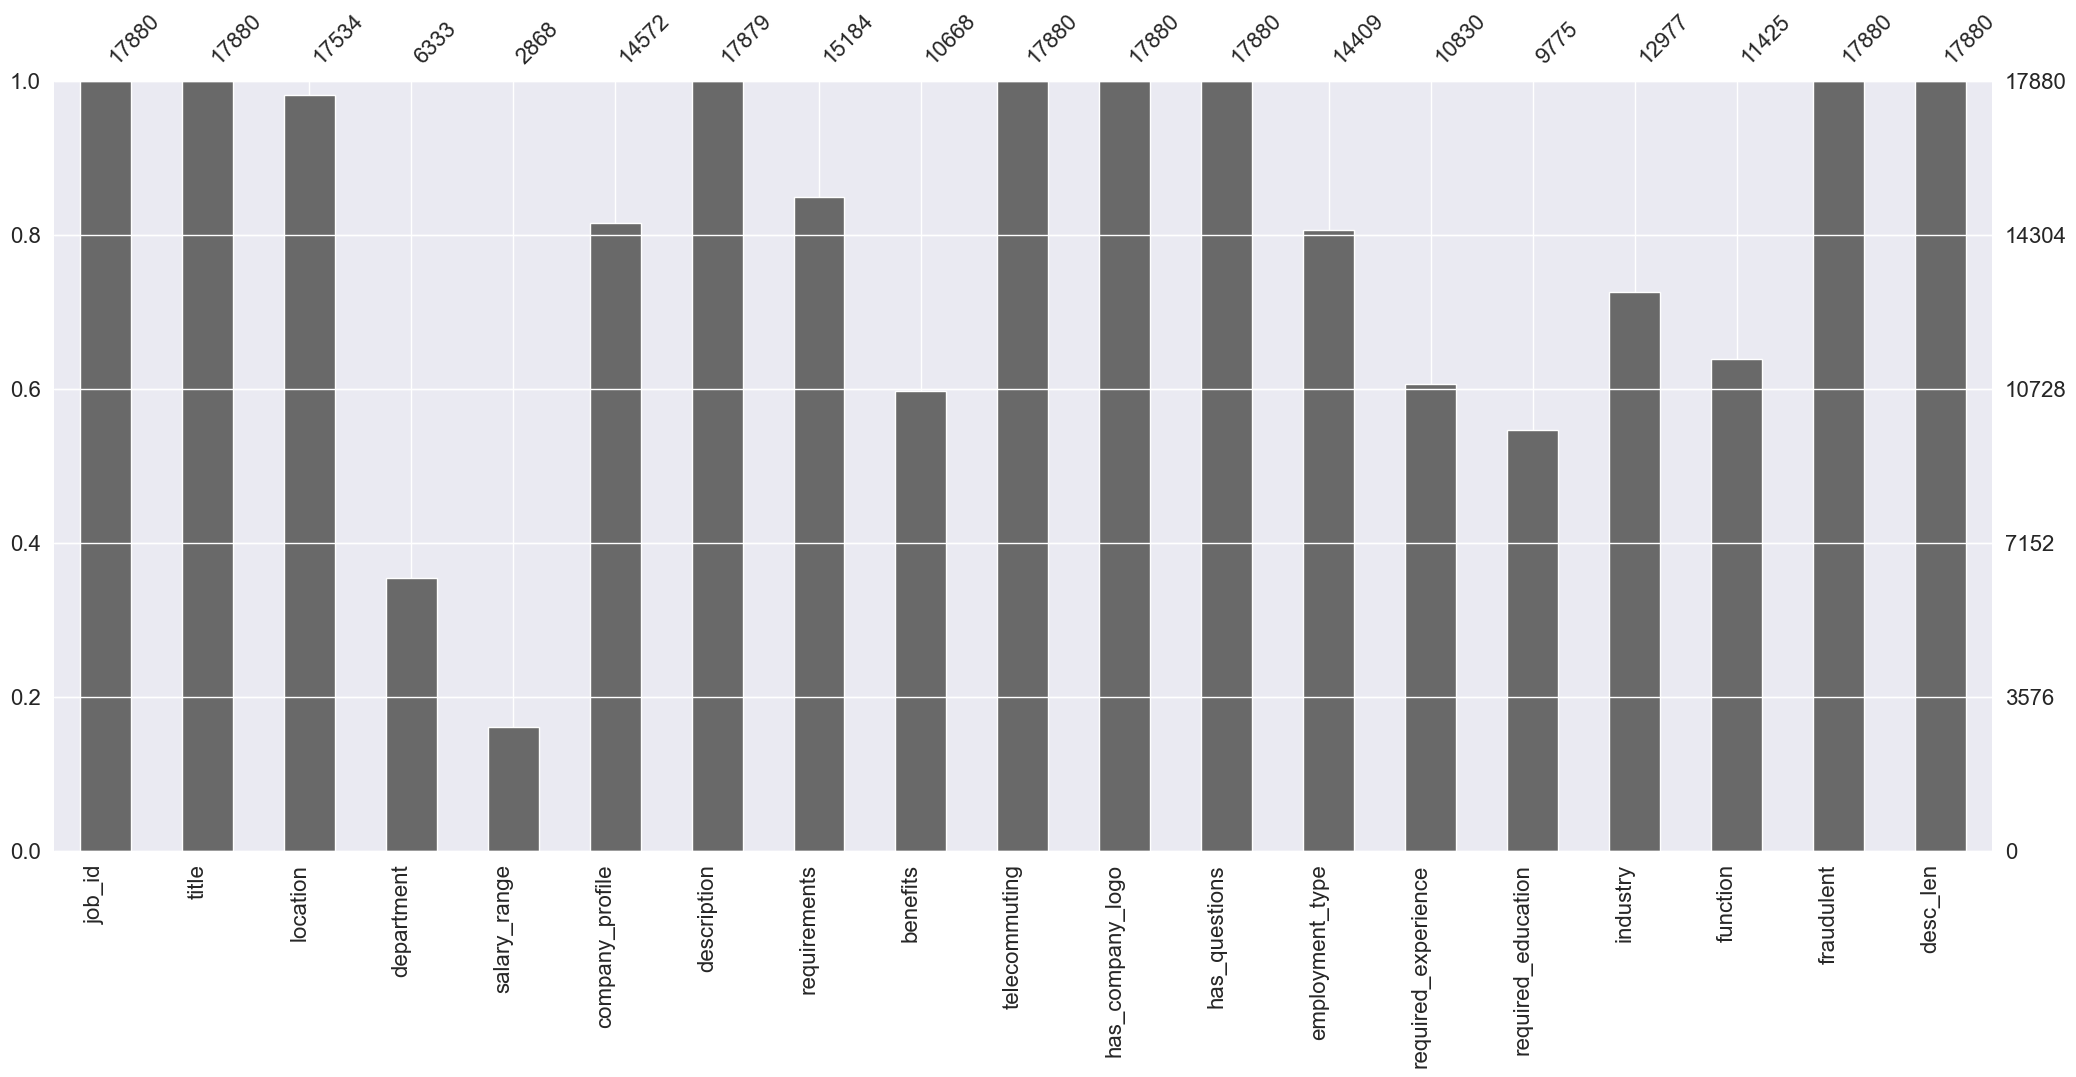

In [14]:
ax = msno.bar(df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xticks(rotation=45)

plt.show()

### employment_type vs fraudulent

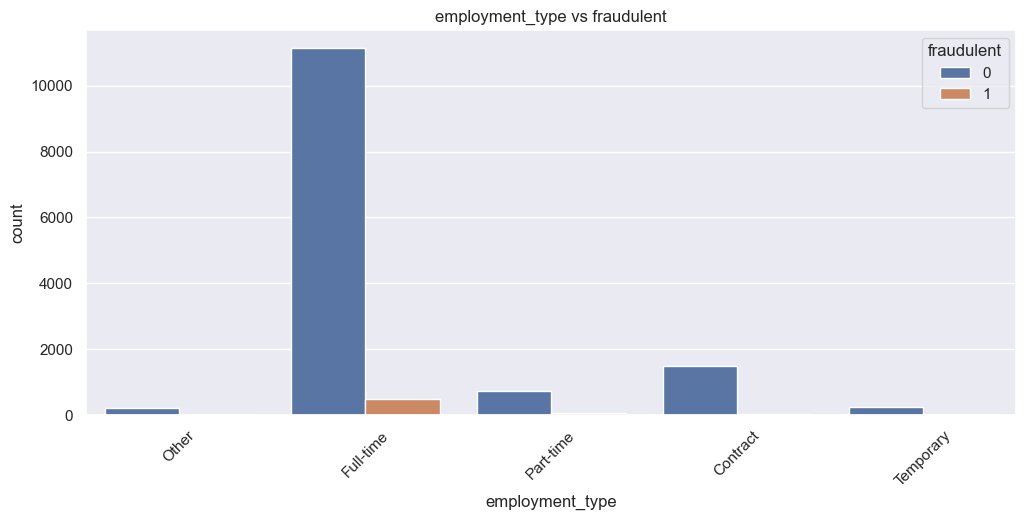

In [15]:
plt.rcParams['figure.figsize'] = (12,5)

sns.countplot(data=df, x='employment_type', hue='fraudulent')
plt.xticks(rotation=45)
plt.title("employment_type vs fraudulent")
plt.show()

### required_experience vs fraudulent

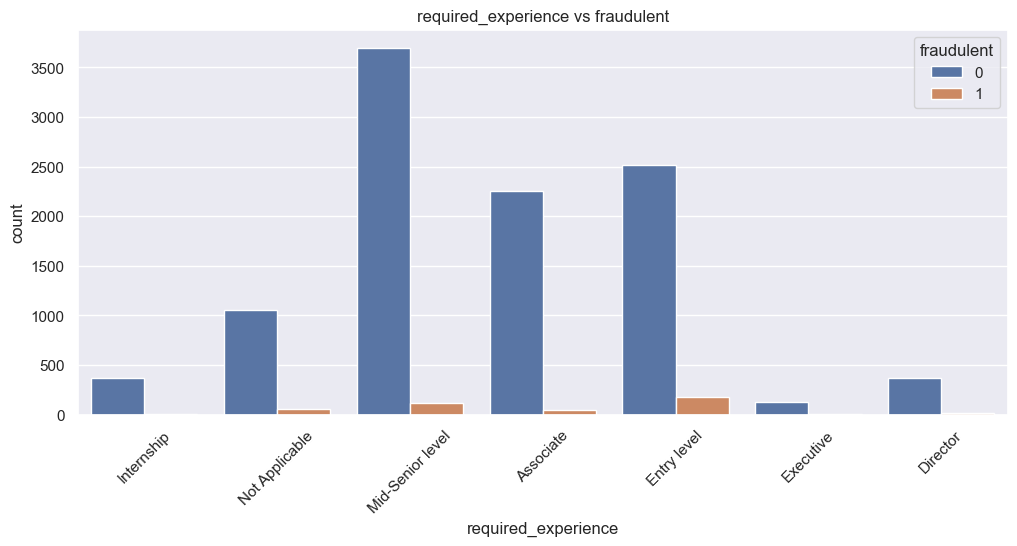

In [16]:
plt.rcParams['figure.figsize'] = (12,5)

sns.countplot(data=df, x='required_experience', hue='fraudulent')
plt.xticks(rotation=45)
plt.title("required_experience vs fraudulent")
plt.show()

### required_education vs fraudulent

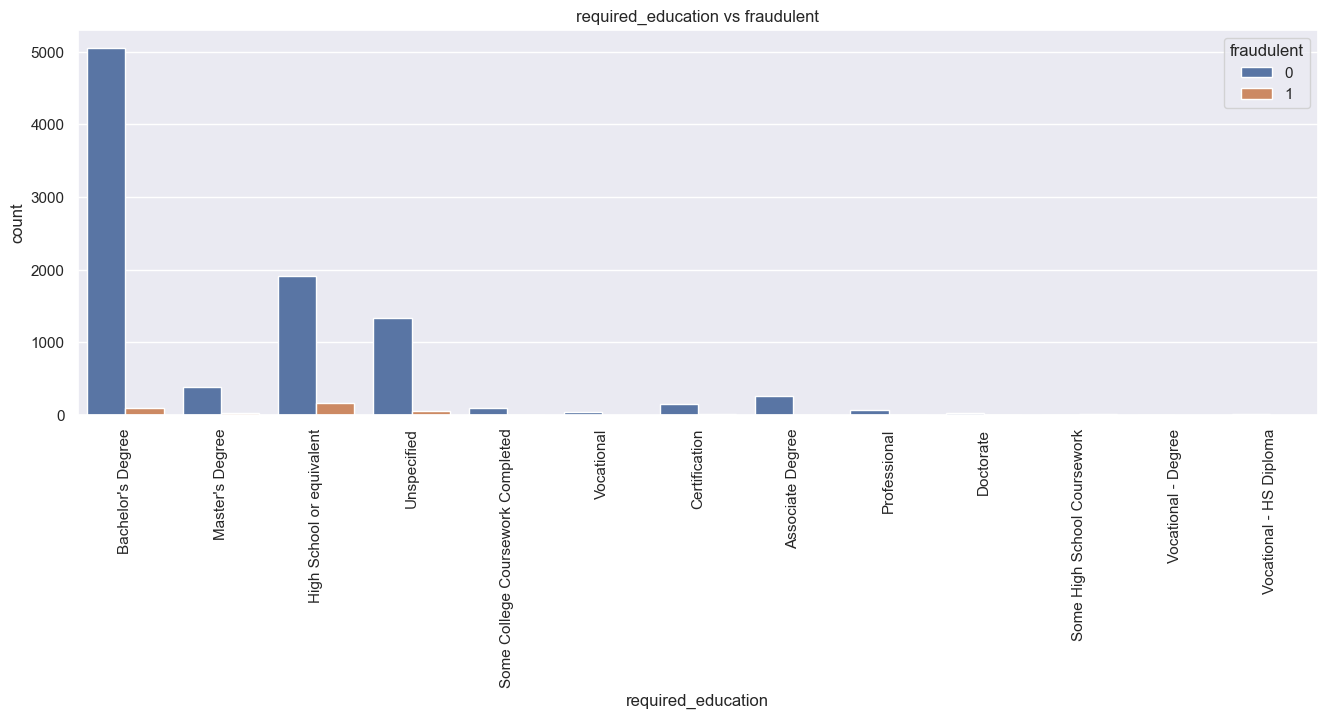

In [17]:
plt.rcParams['figure.figsize'] = (16,5)

sns.countplot(data=df, x='required_education', hue='fraudulent')
plt.xticks(rotation=90)
plt.title("required_education vs fraudulent")
plt.show()

In [18]:
df.sample(1)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,desc_len
8496,8497,Mobile Developer,"US, NY, New York City",NaN,NaN,Maxnet offers Staff Augmentation Solutions for...,"Our client is seeking dynamic, fresh mind and ...",Skills &amp; Experience:Minimum of 2-3 years e...,NaN,0,1,1,Contract,Mid-Senior level,NaN,NaN,NaN,0,168


### Combine the text columns

In [19]:
text_columns = ['title', 'company_profile', 'description', 'requirements', 'benefits']

# Combine the text columns
df['text'] = (df['title'].fillna('') + ' \n' +
              df['company_profile'].fillna('') + ' \n' +
              df['description'].fillna('') + ' \n' +
              df['requirements'].fillna('') + ' \n' +
              df['benefits'].fillna(''))

In [20]:
df[['text', 'fraudulent']].sample(5)

,text,fraudulent
10045,Driver - Heavy Duty (Kent) \nOur HistoryFounde...,0
14220,Entry Level Sales and Marketing Rep - South Ch...,0
225,Settlements Analyst \nMarketInvoice is one of ...,0
4485,Business Development Intern \nWant to build a ...,0
12657,General Production \nVortex® is considered the...,0


### Text cleaning functions (tokenize, remove html/urls, lemmatize)

In [21]:
# Prepare stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    """Lowercase -> remove HTML entities -> remove URLs/emails -> remove non-alpha -> tokenize -> remove stopwords -> lemmatize -> return clean string."""
    if not isinstance(text, str):
        text = str(text)
    # lower
    text = text.lower()
    
    # unescape html
    text = html.unescape(text)
    
    # remove URLs and emails
    text = re.sub(r'http\S+|www\S+|\S+@\S+', ' ', text)
    
    # removing all characters except lowercase letters and whitespace.
    text = re.sub(r'[^a-z\s]', ' ', text)
    
    # collapse whitespace \ normalize whitespace \ remove multiple space, \t, \n
    text = re.sub(r'\s+', ' ', text).strip()
    
    # tokenize & lemmatize
    tokens = [lemmatizer.lemmatize(tok) for tok in text.split() if tok not in stop_words and len(tok) > 1]
    
    # tokens = []
    # for tok in text.split():
    #     if tok not in stop_words and len(tok) > 1:
    #         tokens.append(lemmatizer.lemmatize(tok))

    return ' '.join(tokens)

In [22]:
# Apply cleaning to a sample data
sample = df['text'].astype(str).iloc[:1].apply(clean_text)
print(sample.iloc[0])

marketing intern food created groundbreaking award winning cooking site support connect celebrate home cook give everything need one place top editorial business engineering team focused using technology find new better way connect people around specific food interest offer superb highly curated information food cooking attract talented home cook contributor country also publish well known professional like mario batali gwyneth paltrow danny meyer partnership whole food market random house food named best food website james beard foundation iacp featured new york time npr pando daily techcrunch today show located chelsea new york city food fast growing james beard award winning online food community crowd sourced curated recipe hub currently interviewing full part time unpaid intern work small team editor executive developer new york city headquarters reproducing repackaging existing food content number partner site huffington post yahoo buzzfeed various content management systemsresea

### Apply cleaning text function to the whole dataset

In [23]:
df['text_clean'] = df['text'].astype(str).apply(clean_text)

In [24]:
# check
print(df['text_clean'].iloc[0][:500])

marketing intern food created groundbreaking award winning cooking site support connect celebrate home cook give everything need one place top editorial business engineering team focused using technology find new better way connect people around specific food interest offer superb highly curated information food cooking attract talented home cook contributor country also publish well known professional like mario batali gwyneth paltrow danny meyer partnership whole food market random house food 


### WordCloud

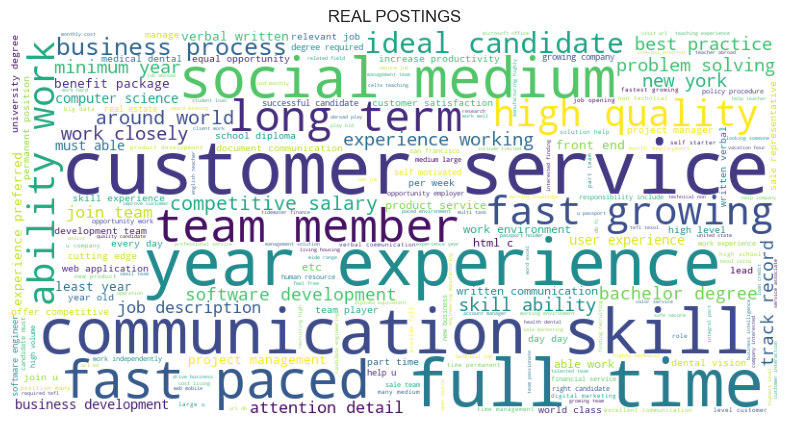

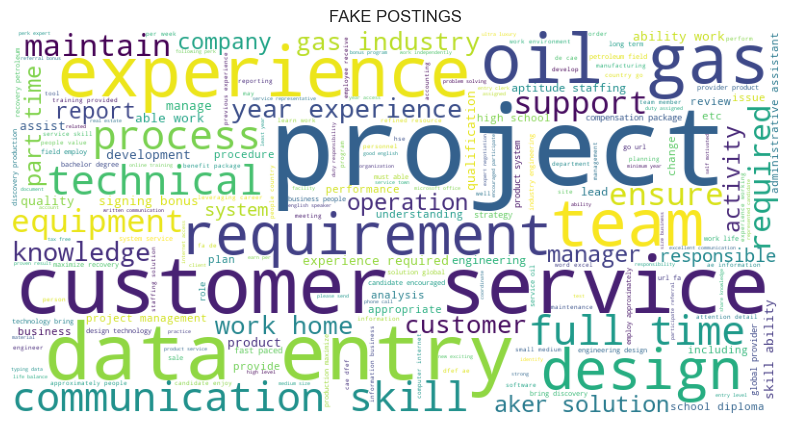

In [25]:
real_text = " ".join(df[df['fraudulent']==0]['text_clean'].dropna())
fake_text = " ".join(df[df['fraudulent']==1]['text_clean'].dropna())

wc_real = WordCloud(width=800, height=400, background_color="white").generate(real_text)
wc_fake = WordCloud(width=800, height=400, background_color="white").generate(fake_text)

plt.imshow(wc_real)
plt.axis("off")
plt.title("REAL POSTINGS")
plt.show()

print("\n" * 3)

plt.imshow(wc_fake)
plt.axis("off")
plt.title("FAKE POSTINGS")
plt.show()

### Text length distributions

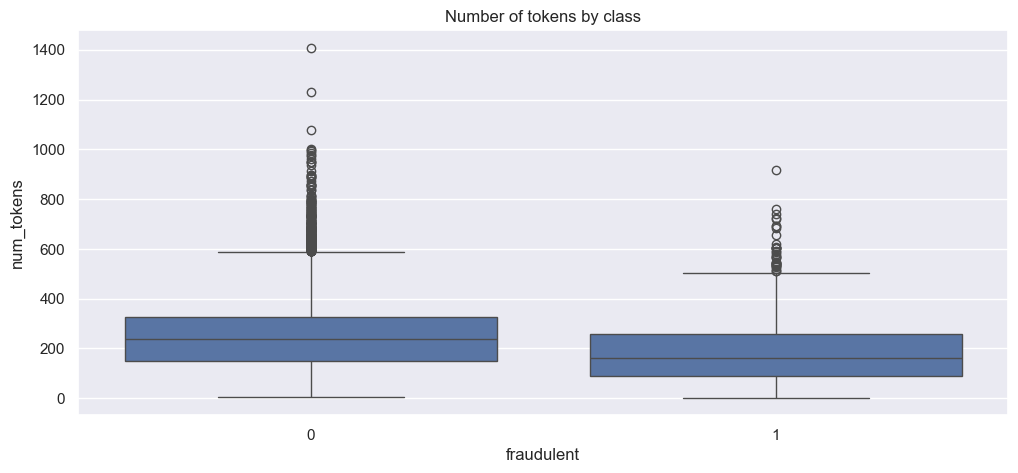

In [26]:
plt.rcParams['figure.figsize'] = (12,5)

df['num_tokens'] = df['text_clean'].apply(lambda x: len(str(x).split()))
sns.boxplot(data=df, x='fraudulent', y='num_tokens')
plt.title("Number of tokens by class")
plt.show()

### Feature extraction: TF-IDF

In [27]:
# TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=20000, ngram_range=(1,2), min_df=5)
X_tfidf = tfidf.fit_transform(df['text_clean'].astype(str))
print('TF-IDF matrix shape:', X_tfidf.shape)

TF-IDF matrix shape: (17880, 20000)


### Prepare labels and train/test split (stratified)

In [28]:
# Label column
y = df['fraudulent'].values

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

print('Train shape:', X_train.shape,'&', 'Test shape:', X_test.shape)
print()
print('Train class distribution:', np.bincount(y_train))
print('Test class distribution:', np.bincount(y_test))

Train shape: (14304, 20000) & Test shape: (3576, 20000)

Train class distribution: [13611   693]
Test class distribution: [3403  173]


### Reusable evaluation & plotting helper function

In [29]:
from sklearn.calibration import CalibratedClassifierCV

def evaluate_model(model, X_test, y_test, model_name='model'):
    # Predict
    y_pred = model.predict(X_test)
    try:
        y_proba = model.predict_proba(X_test)[:,1]
    except Exception:
        # for some models (e.g. SVC without probability) try decision_function
        try:
            y_proba = model.decision_function(X_test)
            # scale for ROC if needed
        except Exception:
            y_proba = None

    # Basic metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    print(f"{model_name} — accuracy: {acc:.4f} precision: {prec:.4f} recall: {rec:.4f} f1: {f1:.4f}")
    print('\nClassification report:\n', classification_report(y_test, y_pred, zero_division=0))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix — {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC curve
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'Area Under the Curve = {auc:.4f}')
        plt.plot([0,1],[0,1],'--')
        plt.title('ROC curve — ' + model_name)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()
    else:
        print('Probability scores not available for this model; skipping ROC.')

### Train model: Logistic Regression

LogisticRegression — accuracy: 0.9815 precision: 0.7635 recall: 0.8960 f1: 0.8245

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3403
           1       0.76      0.90      0.82       173

    accuracy                           0.98      3576
   macro avg       0.88      0.94      0.91      3576
weighted avg       0.98      0.98      0.98      3576



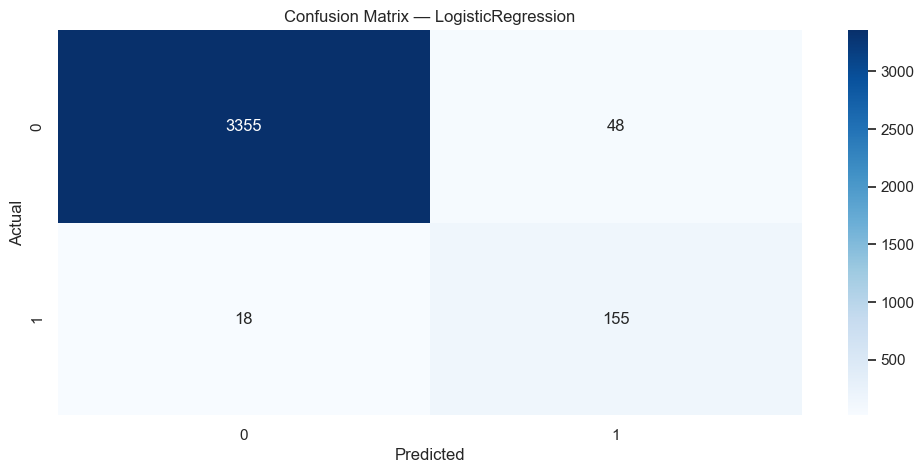

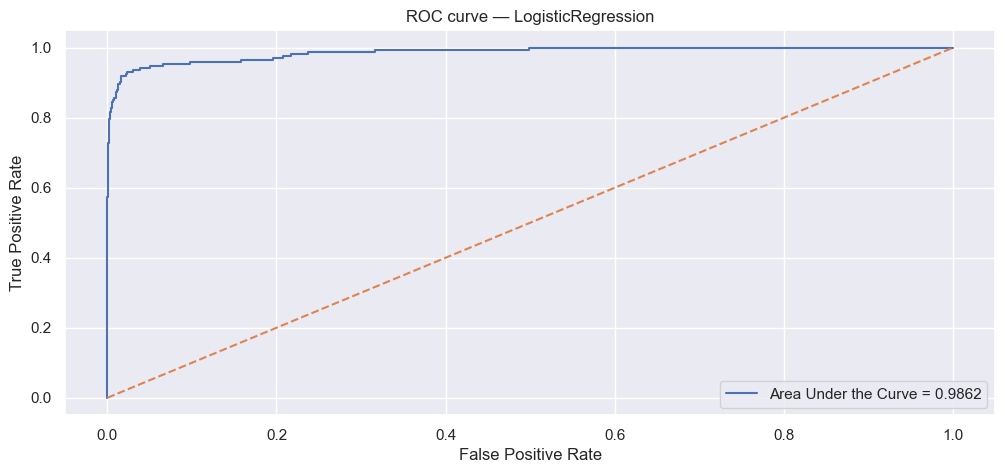

In [30]:
lr = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42, max_iter=200)
lr.fit(X_train, y_train)

# Evaluate
evaluate_model(lr, X_test, y_test, model_name='LogisticRegression')

### Train model: Support Vector Machine (SVM)

SVM — accuracy: 0.9880 precision: 0.9012 recall: 0.8439 f1: 0.8716

Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3403
           1       0.90      0.84      0.87       173

    accuracy                           0.99      3576
   macro avg       0.95      0.92      0.93      3576
weighted avg       0.99      0.99      0.99      3576



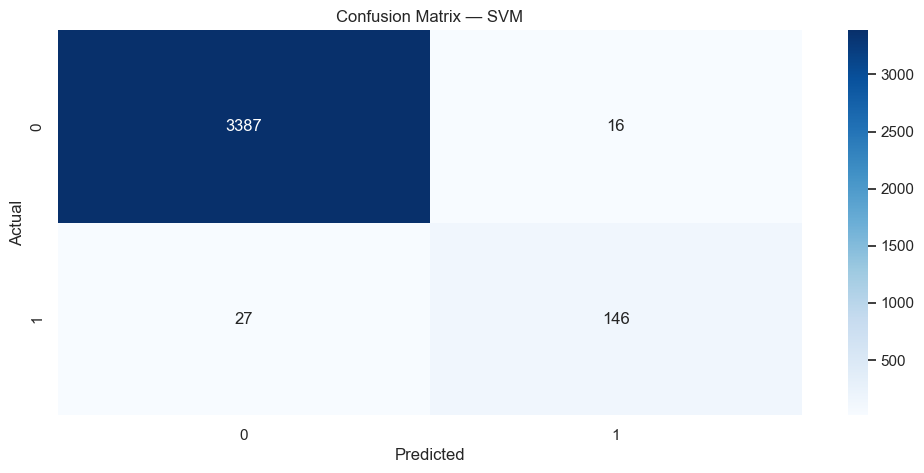

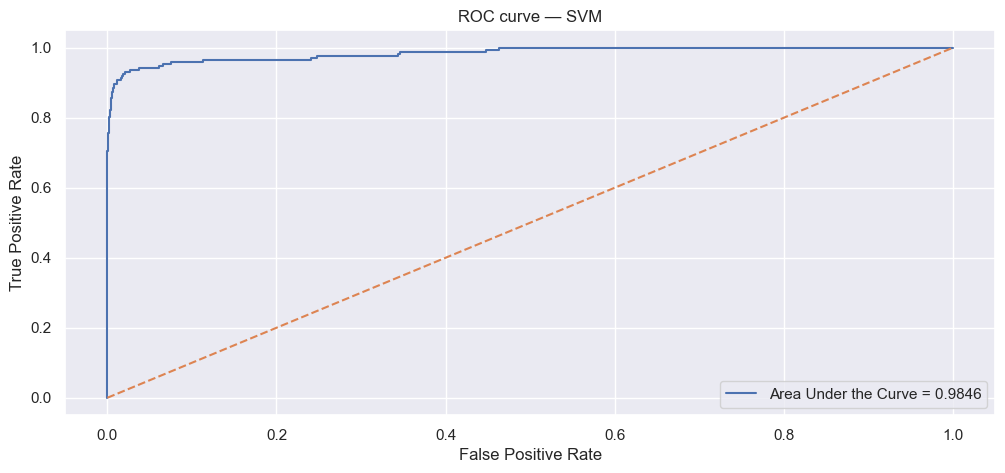

In [31]:
svm = SVC(kernel='linear', probability=True, class_weight='balanced', random_state=42)
svm.fit(X_train, y_train)

evaluate_model(svm, X_test, y_test, model_name='SVM')

### Train model: XGBoost

scale_pos_weight: 19.640692612351092
XGBoost — accuracy: 0.9835 precision: 0.8562 recall: 0.7919 f1: 0.8228

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3403
           1       0.86      0.79      0.82       173

    accuracy                           0.98      3576
   macro avg       0.92      0.89      0.91      3576
weighted avg       0.98      0.98      0.98      3576



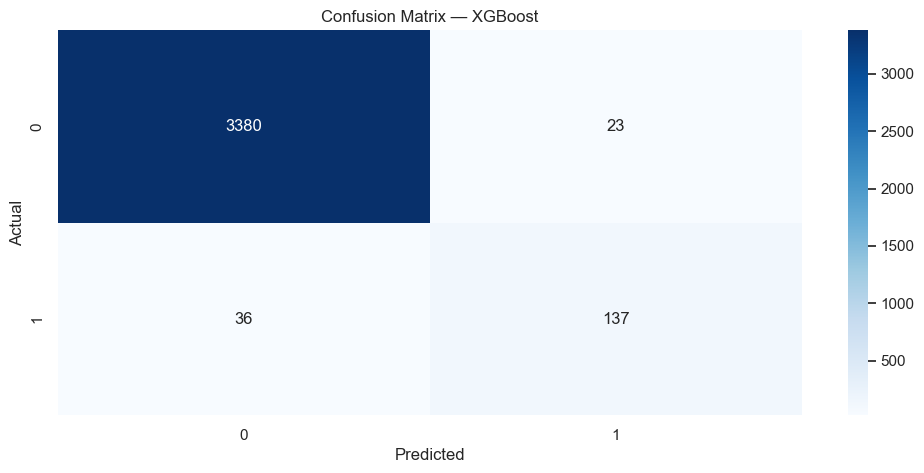

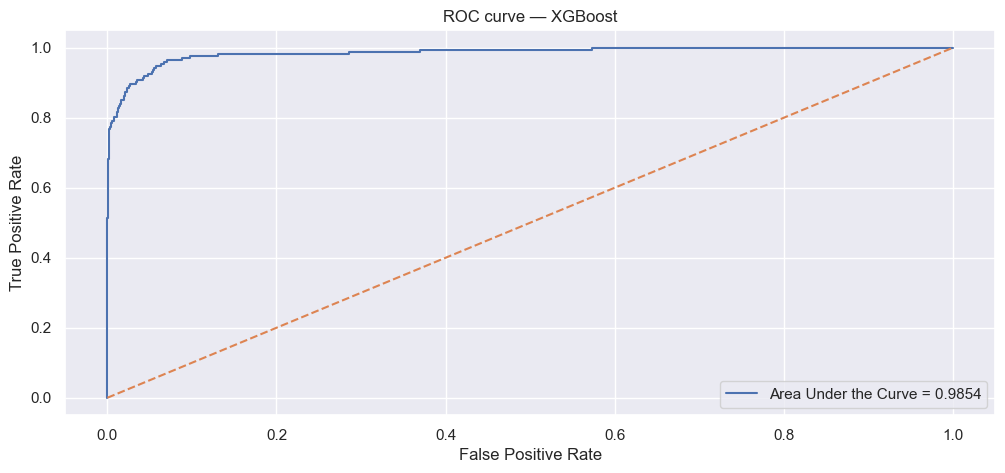

In [32]:
# Compute scale_pos_weight (number of negative / positive samples)
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
scale_pos_weight = neg / (pos + 1e-6)
print('scale_pos_weight:', scale_pos_weight)

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100, max_depth=6,
                            scale_pos_weight=scale_pos_weight, random_state=42)

xgb_clf.fit(X_train, y_train)

evaluate_model(xgb_clf, X_test, y_test, model_name='XGBoost')

### Compare models quickly (summary table)

In [33]:
models = {'LogisticRegression': lr, 'SVM': svm, 'XGBoost': xgb_clf}
summary = []
for name, m in models.items():
    y_pred = m.predict(X_test)
    try:
        y_proba = m.predict_proba(X_test)[:,1]
    except Exception:
        try:
            y_proba = m.decision_function(X_test)
        except Exception:
            y_proba = None
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan
    summary.append({
        'model': name,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'f1': f1_score(y_test, y_pred, zero_division=0),
        'roc_auc': auc
    })

summary_df = pd.DataFrame(summary).sort_values(by='f1', ascending=False)
display(summary_df)

,model,accuracy,precision,recall,f1,roc_auc
1,SVM,0.987975,0.901235,0.843931,0.871642,0.984614
0,LogisticRegression,0.981544,0.763547,0.895954,0.824468,0.986202
2,XGBoost,0.983501,0.856250,0.791908,0.822823,0.985351


### Model explainability with SHAP

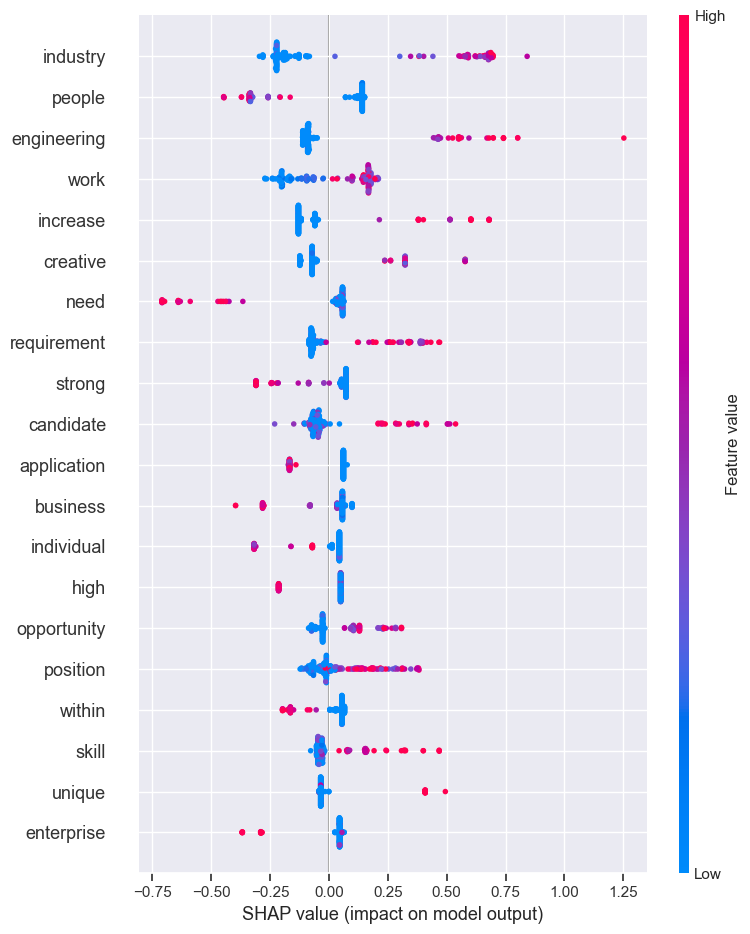

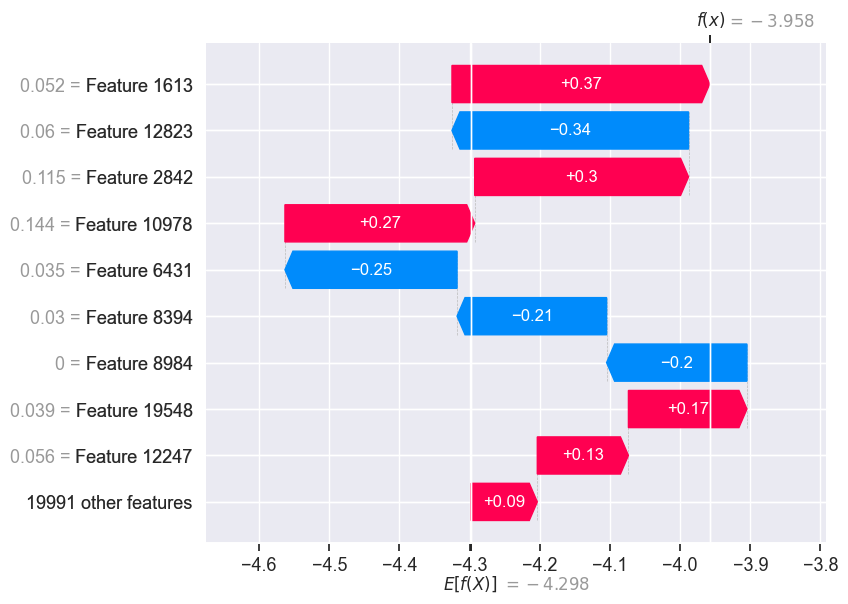

In [34]:
# Use a small background sample for SHAP (important for speed)
background = X_train[:200].toarray()
explainer = shap.Explainer(xgb_clf, background)  # Tree explainer used automatically for XGB

# compute SHAP values on a small part of the test set
shap_vals = explainer(X_test[:200].toarray())

# summary plot (global feature importance)
shap.summary_plot(shap_vals, feature_names=tfidf.get_feature_names_out())

# For a single prediction (index 0)
shap.plots.waterfall(shap_vals[0])

### Local explainability with LIME (text)

In [35]:
# Build a pipeline for the chosen model
pipeline_lr = Pipeline([('tfidf', tfidf), ('clf', LogisticRegression(solver='liblinear', class_weight='balanced'))])

# Train pipeline
X_text = df['text_clean'].astype(str)
X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(X_text, y, test_size=0.2, random_state=42, stratify=y)

pipeline_lr.fit(X_train_text, y_train_text)

# LIME text explainer for a single sample
class_names = ['real', 'fake']
explainer_lime = LimeTextExplainer(class_names=class_names)

idx = X_test_text.index[0]
exp = explainer_lime.explain_instance(X_test_text.loc[idx], pipeline_lr.predict_proba, num_features=10)
exp.show_in_notebook(text=True)

### Save best model and TF-IDF vectorizer

In [36]:
best_model = xgb_clf

joblib.dump(best_model, 'best_model_xgb.joblib')
joblib.dump(tfidf, 'tfidf_vectorizer.joblib')

print('Saved model and vectorizer to the current folder')

Saved model and vectorizer to the current folder
